# Testing a few available pretrained models

In [4]:
import tensorflow_hub as hub
import tensorflow as tf
from keras.models import load_model
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
model = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")

In [4]:
model1 = tf.saved_model.load('../raw_data/models/esrgan-tf2_1')

In [79]:
train_dir = "../raw_data/Kaggle100"

n=10

lr_list = os.listdir(train_dir+"/LR")[:n]

lr_images = []
for img in lr_list:
    img_lr = cv2.imread(train_dir+"/LR/" + img)
    img_lr = cv2.cvtColor(img_lr, cv2.COLOR_BGR2RGB)
    lr_images.append(img_lr)


hr_list = os.listdir(train_dir+"/HR")[:n]

hr_images = []
for img in hr_list:
    img_hr = cv2.imread(train_dir+"/HR/" + img)
    img_hr = cv2.cvtColor(img_hr, cv2.COLOR_BGR2RGB)
    hr_images.append(img_hr)

lr_images = np.array(lr_images)
hr_images = np.array(hr_images)

In [80]:
temp=tf.cast(lr_images, tf.float32)

In [93]:
sr_image=model1(temp)
sr_image = np.asarray(sr_image)
#sr_image = tf.clip_by_value(sr_image, 0, 255)
sr_image = tf.cast(sr_image, tf.uint8)

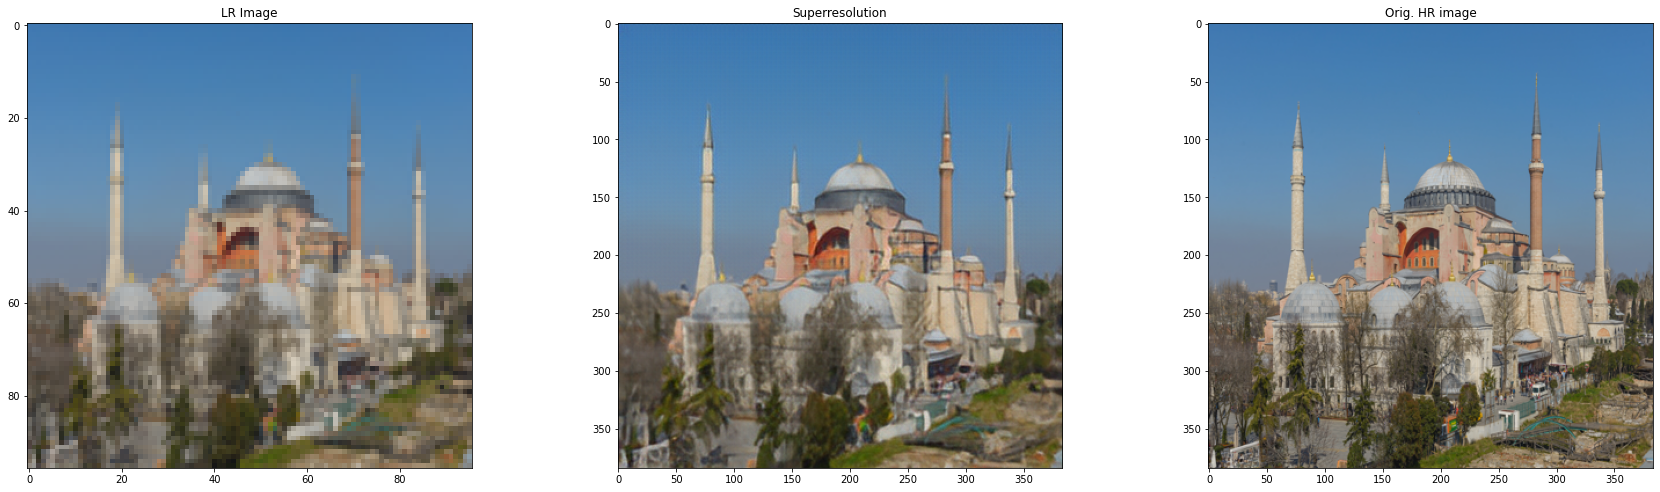

In [94]:
idx=5
plt.figure(figsize=(30, 18))
plt.subplot(231)
plt.title('LR Image')
plt.imshow(lr_images[idx])
plt.subplot(232)
plt.title('Superresolution')
plt.imshow(sr_image[idx])
plt.subplot(233)
plt.title('Orig. HR image')
plt.imshow(hr_images[idx])

plt.show();